In [1]:
from qiskit.providers.fake_provider import FakeHanoi

backend = FakeHanoi()

In [2]:
config = backend.configuration()

# Basic Features
print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates))

This backend is called fake_hanoi, and is on version 1.0.18. It has 27 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].


In [3]:
props = backend.properties()

def describe_qubit(qubit, properties):
    """Print a string describing some of reported properties of the given qubit."""

    # Conversion factors from standard SI units
    us = 1e6
    ns = 1e9
    GHz = 1e-9

    print("Qubit {0} has a \n"
          "  - T1 time of {1} microseconds\n"
          "  - T2 time of {2} microseconds\n"
          "  - U2 gate error of {3}\n"
          "  - U2 gate duration of {4} nanoseconds\n"
          "  - resonant frequency of {5} GHz".format(
              qubit,
              properties.t1(qubit) * us,
              properties.t2(qubit) * us,
              properties.gate_error('sx', qubit),
              properties.gate_length('sx', qubit) * ns,
              properties.frequency(qubit) * GHz))

describe_qubit(0, props)

Qubit 0 has a 
  - T1 time of 162.29562357444243 microseconds
  - T2 time of 171.74648699183206 microseconds
  - U2 gate error of 0.00013790682762652163
  - U2 gate duration of 21.333333333333332 nanoseconds
  - resonant frequency of 5.035257503599211 GHz


In [5]:
defaults = backend.defaults()

q0_freq = defaults.qubit_freq_est[0]  # Hz
q0_meas_freq = defaults.meas_freq_est[0]  # Hz

GHz = 1e-9
print("DriveChannel(0) defaults to a modulation frequency of {} GHz.".format(q0_freq * GHz))
print("MeasureChannel(0) defaults to a modulation frequency of {} GHz.".format(q0_meas_freq * GHz))

DriveChannel(0) defaults to a modulation frequency of 5.035257503599211 GHz.
MeasureChannel(0) defaults to a modulation frequency of 7.1653715820000015 GHz.


In [6]:
calibrations = defaults.instruction_schedule_map
print(calibrations)

<InstructionScheduleMap(1Q instructions:
  q0: {'measure', 'rz', 'u1', 'x', 'id', 'u3', 'u2', 'sx'}
  q1: {'measure', 'rz', 'u1', 'x', 'id', 'u3', 'u2', 'sx'}
  q2: {'measure', 'rz', 'u1', 'x', 'id', 'u3', 'u2', 'sx'}
  q3: {'measure', 'rz', 'u1', 'x', 'id', 'u3', 'u2', 'sx'}
  q4: {'measure', 'rz', 'u1', 'x', 'id', 'u3', 'u2', 'sx'}
  q5: {'measure', 'rz', 'u1', 'x', 'id', 'u3', 'u2', 'sx'}
  q6: {'measure', 'rz', 'u1', 'x', 'id', 'u3', 'u2', 'sx'}
  q7: {'measure', 'rz', 'u1', 'x', 'id', 'u3', 'u2', 'sx'}
  q8: {'measure', 'rz', 'u1', 'x', 'id', 'u3', 'u2', 'sx'}
  q9: {'measure', 'rz', 'u1', 'x', 'id', 'u3', 'u2', 'sx'}
  q10: {'measure', 'rz', 'u1', 'x', 'id', 'u3', 'u2', 'sx'}
  q11: {'measure', 'rz', 'u1', 'x', 'id', 'u3', 'u2', 'sx'}
  q12: {'measure', 'rz', 'u1', 'x', 'id', 'u3', 'u2', 'sx'}
  q13: {'measure', 'rz', 'u1', 'x', 'id', 'u3', 'u2', 'sx'}
  q14: {'measure', 'rz', 'u1', 'x', 'id', 'u3', 'u2', 'sx'}
  q15: {'measure', 'rz', 'u1', 'x', 'id', 'u3', 'u2', 'sx'}
  q16: {'

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


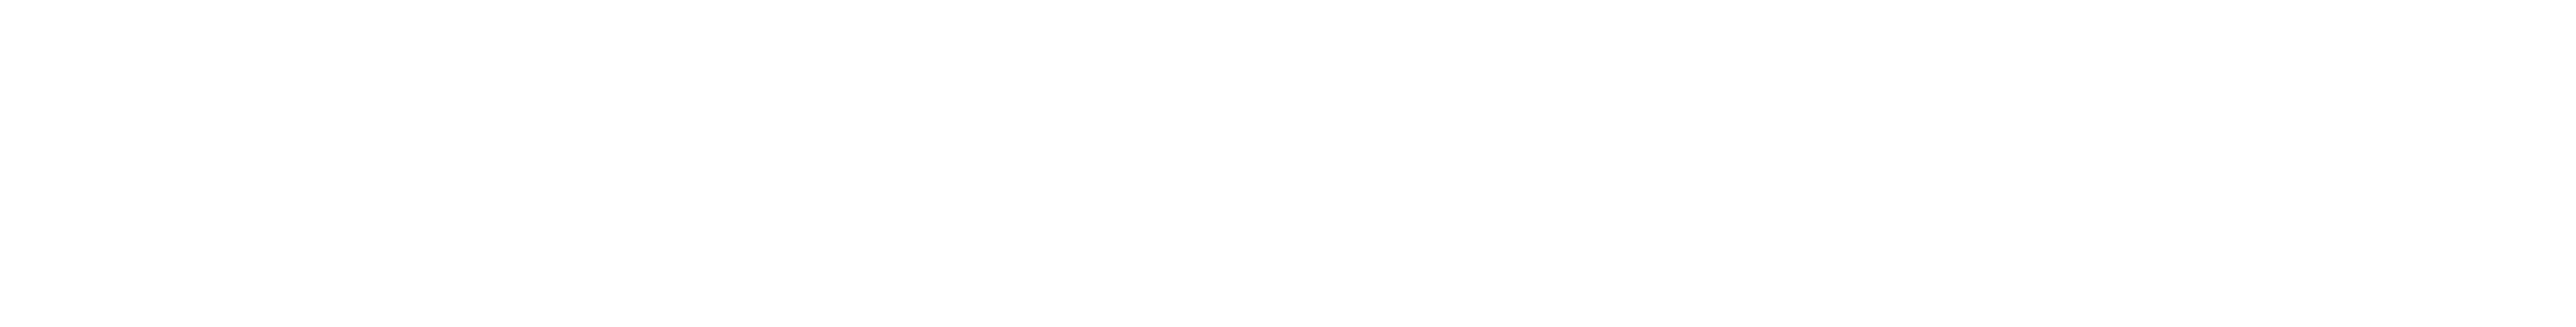

<IPython.core.display.Javascript object>


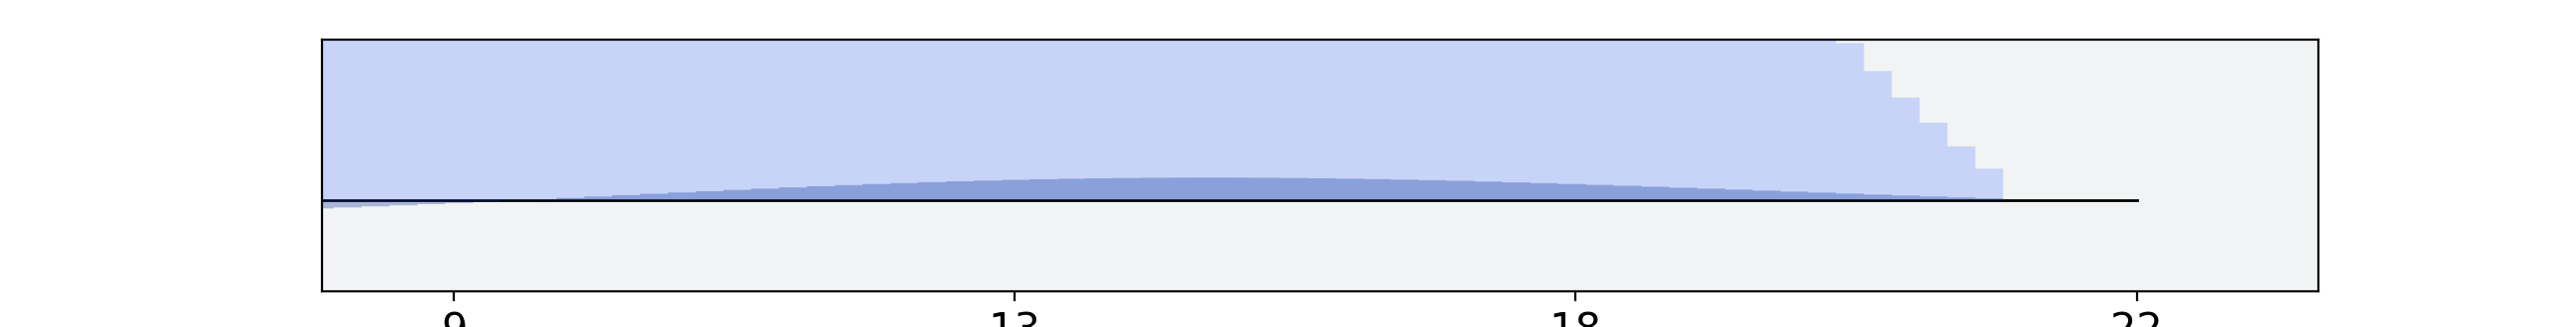

In [22]:
measure_schedule = calibrations.get('sx', range(1))
measure_schedule.draw(backend=backend)
